# Ghouls_Goblins_Ghosts

**Challange (as listed on kaggle.com):**  
Get out your dowsing rods, electromagnetic sensors, and gradient boosting machines. Kaggle is haunted and we need your help. After a month of making scientific observations and taking careful measurements, we’ve determined that 900 ghouls, ghosts, and goblins are infesting our halls and frightening our data scientists. When trying garlic, asking politely, and using reverse psychology didn't work, it became clear that machine learning is the only answer to banishing our unwanted guests.

So now the hour has come to put the data we’ve collected in your hands. We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. And only an accurate classification algorithm can thwart them. Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. Are you ghost-busters up for the challenge?

**Solution:**  
I will tackle this problem in two parts. i) Exploratory data analysis for in-depth understanding of the features of the data using *pandas* and *matplotlib* libraries. ii) Applying different machine learning alogrithms/techniquies using *scikit-learn* library

# Part 1: Exploratory Data Analysis

Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

Importing training and test data (index of the dataset is set as the id of the creature) 

In [2]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

Data Fields:  
*id* - id of the creature  
*bone_length* - average length of bone in the creature, normalized between 0 and 1  
*rotting_flesh* - percentage of rotting flesh in the creature  
*hair_length* - average hair length, normalized between 0 and 1  
*has_soul* - percentage of soul in the creature  
*color* - dominant color of the creature: 'white','black','clear','blue','green','blood'  
*type* - target variable: 'Ghost', 'Goblin', and 'Ghoul'

In [3]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
train.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


This data is relatively clean an there is no missing values (data count to be exactly 371 for all data fields). Moreover, continuous data fields (all data fields except *color* and *type*) are already normalized between 0 to 1. Doing these tasks takes around 50%-70% of the time in data science problems. Kaggle.com generally provides clean datasets so if one wants to learn data cleaning and munging, kaggle.com is not the right place.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D27B9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0F6470>]], dtype=object)

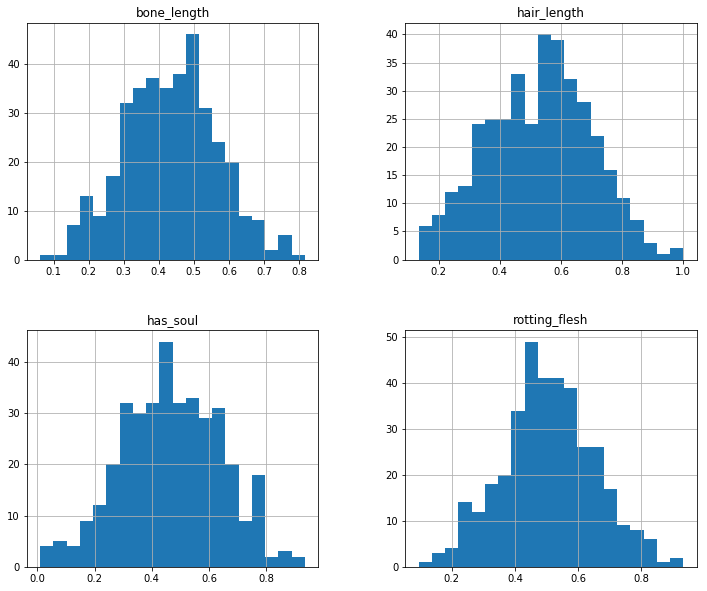

In [27]:
train.hist(figsize=(12,10), bins =20)

Note that the histograms of all continuous data fields have mean around 0.5 and it looks like data has been generated using truncated Gussian distributation with different standard deviations

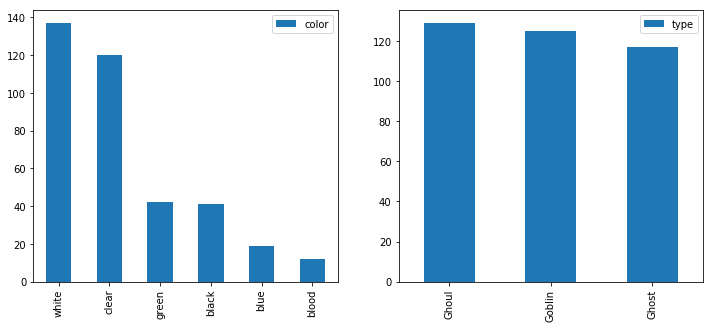

In [28]:
f, axarr = plt.subplots(1, 2, figsize=(12,5))
train[['color']].apply(pd.value_counts).plot.bar(ax = axarr[0])
train[['type']].apply(pd.value_counts).plot.bar(ax = axarr[1])

*color* data field has non-uniform number of labels with *white* and *dear* have maximum occurrences whereas *blue* and *blood* have least. Classification would have been more easier with uniform nuumber of labels. We are fortunate to have that for *type* data field with *Ghoul*, *Goublin* and *Ghost* have almost same number of occurances (around 120 each).